In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [10]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

selected_year = dt.date(2019, 5, 14) - dt.timedelta(days=365)
print(selected_year)

2018-05-14


In [13]:
# Perform a query to retrieve the data and precipitation scores

prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2017-05-14', Measurement.date <= '2018-05-14').\
    order_by(Measurement.date).all()

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp)
prcp_df.head()

,date,prcp
0,2017-05-14,0.00
1,2017-05-14,0.05
2,2017-05-14,0.00
3,2017-05-14,0.17
4,2017-05-14,1.00


In [15]:
# Sort the dataframe by date

prcp_df.set_index('date').head()

,prcp
date,
2017-05-14,0.00
2017-05-14,0.05
2017-05-14,0.00
2017-05-14,0.17
2017-05-14,1.00


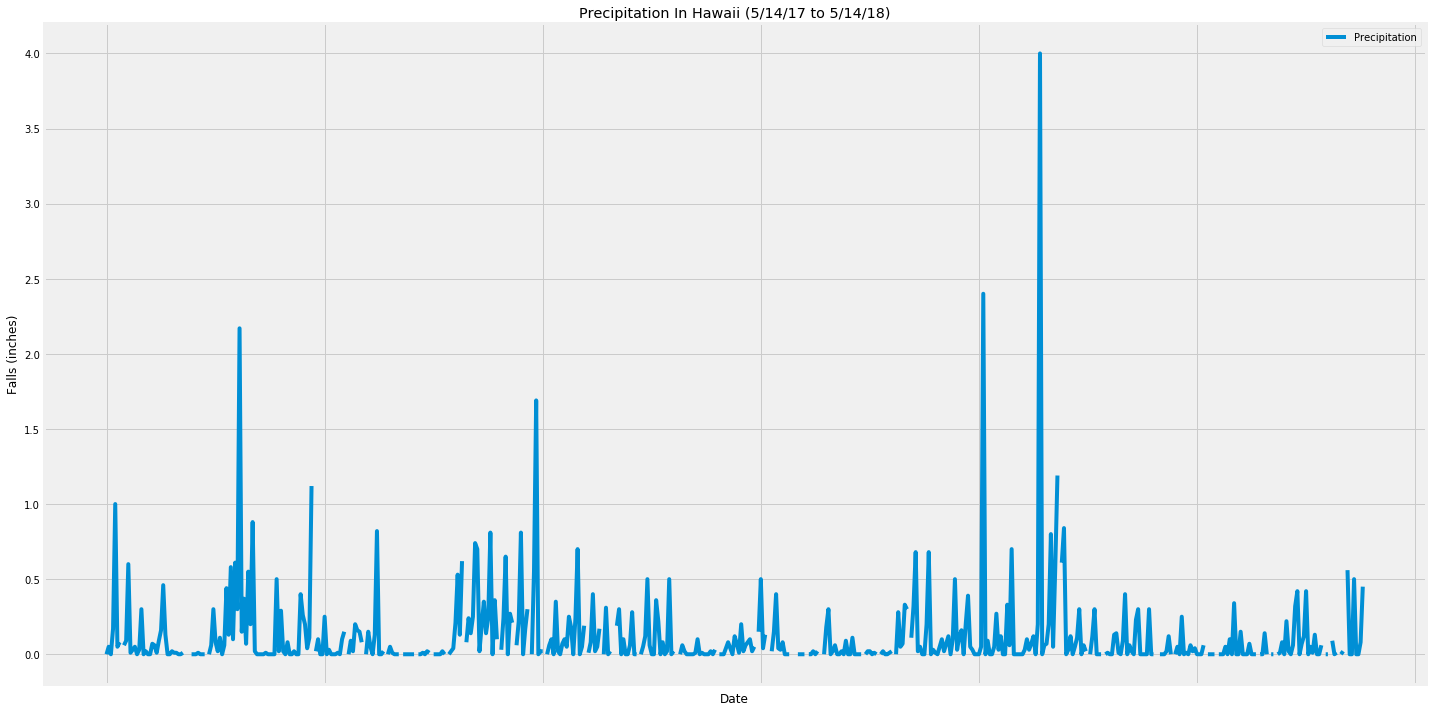

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot('date', 'prcp', figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Falls (inches)")
plt.title("Precipitation In Hawaii (5/14/17 to 5/14/18)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the parecipitation data
prcp_df.describe()

,prcp
count,524.000000
mean,0.121489
std,0.291781
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [18]:
# How many Stations are available in this dataset?

total_stations = session.query(Measurement).group_by(Measurement.station).count()
print("Totally we have {} stations in this data source.".format(total_stations))

Totally we have 9 stations in this data source.


In [19]:
# What are the most active stations?
# List the stations and the counts in decending order.

active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.tobs).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id form the previous query, calculate the lowest temprature recorded
# Highest temprature recorded, and average temperature most active station

the_most_active = active_stations[0][0]

observethe_most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == the_most_active).all()
observethe_most_active_temps

[(54.0, 85.0, 71.66378066378067)]

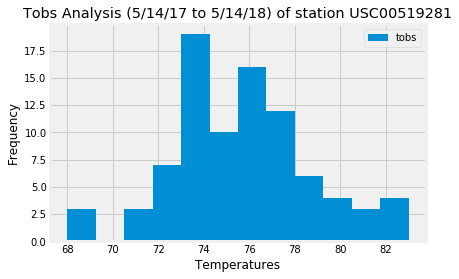

In [21]:
# Choose the station with the highest number of temprature observations
# Query the last 12 months of temprature observation data for this station and plot th results as a histogram

start_date = dt.datetime(2017,5,14)
end_date = dt.datetime(2018,5,14)

temps = session.query(Measurement.tobs, Measurement.station, Measurement.date).\
        filter(Measurement.date >= start_date, Measurement.date <= end_date).\
        filter(Measurement.station == the_most_active).\
        order_by(Measurement.date).all()

temp_df = pd.DataFrame(temps)

plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperatures")
plt.ylabel("Frequency")
plt.title(f"Tobs Analysis (5/14/17 to 5/14/18) of station {the_most_active}")
plt.legend(["tobs"])
plt.show()

In [23]:
# Write a function called 'calc temps' taht will accept start date and end date in the format '%Y-%m-%d'
# and return the minimum, average, and maximum tempratures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, AND TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%M-%D
        end_date (string): A date sting in the format %Y-%M-%D
        
    Returns:
        TMIN, TAVE and TMAX
    """
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-03-17', '2017-04-17'))

[(65.0, 73.91878172588832, 82.0)]


In [24]:
# Use your previous funciton 'calc temps' to calculate the tmin, tavg, and tmax
# for your trip using the previous year's data for those same dates.
# Dates are March 17th to April 17th 2016:

arrival_date = dt.date(2016,3,17)
departure_date = dt.date(2016,4,7)
all_temps = (calc_temps(arrival_date, departure_date))
all_temps

[(62.0, 71.3021582733813, 82.0)]

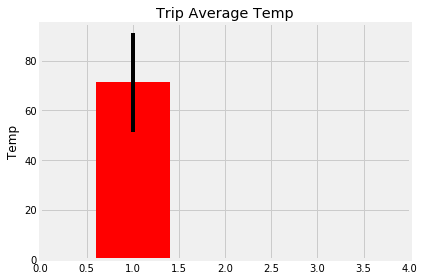

In [26]:
# Plot the results from your previous query as a bar chart
# Use "Trip Avg Temp" as your title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar yerr

temp_min = all_temps[0][0]
temp_avg = all_temps[0][1]
temp_max = all_temps[0][2]
p2p = all_temps[0][2]-all_temps[0][0]

fig, ax = plt.subplots()
bar_chart = ax.bar(1, temp_avg, color = 'red', yerr = p2p)
ax.set_ylabel("Temp")
ax.set_title("Trip Average Temp")
plt.ylim(0, 95)
plt.xlim(0, 4)
fig.tight_layout()

In [27]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, Longitude, and elevation

arrival_date = dt.date(2016,3,17)
departure_date = dt.date(2016,4,17)

station_check = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).\
    filter(Measurement.date >= arrival_date).\
    filter(Measurement.date <= departure_date).\
    order_by(Measurement.prcp.desc()).all()

print(station_check)

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.9), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.9), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.9), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 1.9), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 1.9), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 1.9), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.9), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 1.9), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.9), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.78), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.78), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.78), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -15

## Optional Challenge Assignment